# The goal
The goal is to understand how to use the dataset and make a model to predict diabetes based on multiple factors such as number of pregnancies, glucose level, blood pressure, skin thickness, BMI, age. 

# Reading the dataset

In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
plt.close("all")

data = pd.read_csv("Healthcare-Diabetes.csv", sep=",")

data.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


Number of entries:

In [260]:
data.size

27680

Check if there are null fields

In [261]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [262]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Glucose, BloodPresure, SkinThickness, Insulin, BMI have minimal values 0. This should be further researched while data cleaning to see if values can be 0.

In [263]:
data.shape

(2768, 10)

# Understanding the data

## What is diabetes? 
Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy.

## Types
- **Type 1** - If you have type 1 diabetes, your body makes little or no insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.
- **Type 2** - If you have type 2 diabetes, the cells in your body don’t use insulin properly. The pancreas may be making insulin but is not making enough insulin to keep your blood glucose level in the normal range. Type 2 diabetes is the most common type of diabetes. You are more likely to develop type 2 diabetes if you have risk factors, such as overweight or obesity, and a family history of the disease. You can develop type 2 diabetes at any age, even during childhood.
- **Gestional diabetes** - Gestational diabetes is a type of diabetes that develops during pregnancy. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a higher chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is type 2 diabetes.

## Risk Factors
You can develop type 2 diabetes at any age, even during childhood. You are more likely to develop type 2 diabetes if you1
- are overweight or have obesity.
- are age 35 or older. Children and teens can also develop type 2 diabetes, but the risk increases as a person gets older.
- have a family history of diabetes.
- are African American, American Indian, Asian American, Hispanic/Latino, or Pacific Islander.
- are not physically active, because of physical limitations, a sedentary lifestyle, or a job that requires sitting for  long periods of time.
- have prediabetes.
- have a history of gestational diabetes, a type of diabetes that develops during pregnancy, or gave birth to a baby weighing 9 pounds or more.

Out of all these, we have data that relates only to first 3 risk factors. 


# Data cleaning

In [264]:
# Drop Id column as it is irelevant to our research
data.drop(columns=["Id"], inplace=True)

# Drop duplicates 
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

# Drop rows where BMI, Skin Thickness and Blood Pressure are 0.
data = data[data["BMI"]!=0]
data = data[data["SkinThickness"]!=0]
data = data[data["BloodPressure"]!=0]

# It's mostly unlikely in real word for someone to have glucose and insulin -  0 
data = data[(data["Glucose"]!=0) & (data["Insulin"]!=0)] 

Final dataset size:

In [265]:
data.size

3573

## Data visualization
### Relation of Diabetes Pedigree Function and Outcome of having diabites
Firstly, let's check how much does DPF impacts the outcome. 

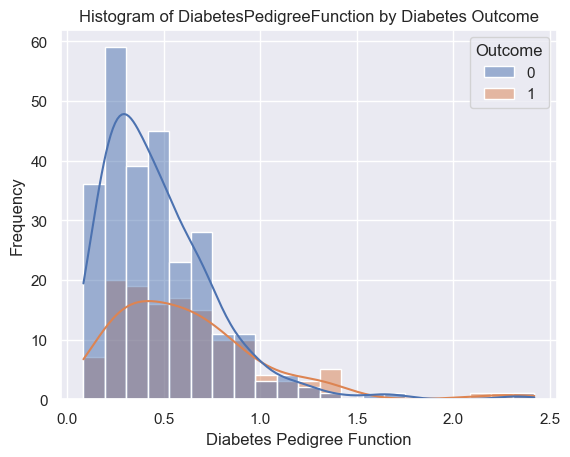

In [266]:
sns.set(style="darkgrid")

# Create histogram
sns.histplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome', kde=True)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.title('Histogram of DiabetesPedigreeFunction by Diabetes Outcome')
plt.show()

As we see, we have people with diabetes in all ranges and vice versa. We can see that most people are in the 0 - 1 range and that people are 3-4 more than people with.
### Let's look how features depend on each other with a heatmap

<Axes: >

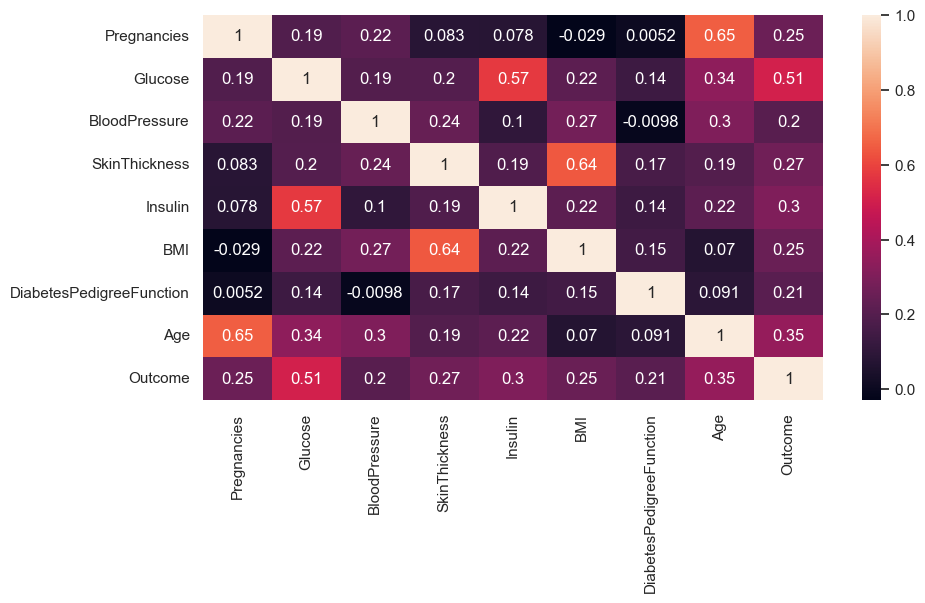

In [267]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

### Distribution of Age by Diabetes Outcome 

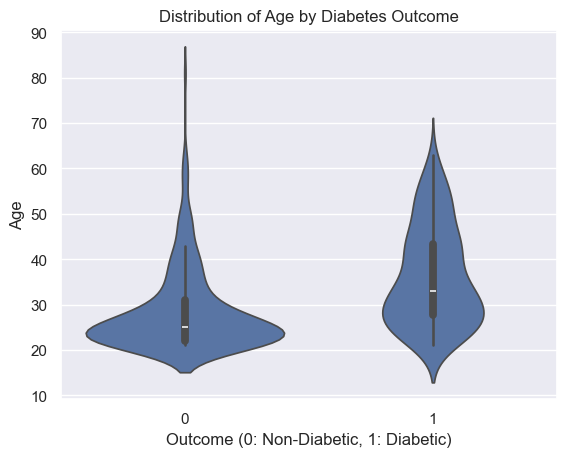

In [268]:
sns.violinplot(x='Outcome', y='Age', data=data)
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Age')
plt.title('Distribution of Age by Diabetes Outcome')
plt.show()

# Creating the model
## Feature Selection
Firstly, we need to find the features with most impact.

In [269]:
# X - our features (Age, BMI, BloodThickness etc.) and Y is Outcome
X = data.iloc[:,0:8]
Y = data.iloc[:,-1]

# Selecting best 3 features
best_features = SelectKBest(score_func=chi2, k=8)
fit = best_features.fit(X,Y)

# Creating a data frame for visual representation
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['Features', 'Score']
features_scores.sort_values(by = 'Score')


,Features,Score
6,DiabetesPedigreeFunction,4.017798
2,BloodPressure,37.496532
5,BMI,38.025580
0,Pregnancies,79.592328
3,SkinThickness,107.954898
7,Age,170.984107
1,Glucose,792.361129
4,Insulin,3235.433070


## Create the model
We will use logistic regression as it is the best when we have a binary outcome.

In [270]:
X=data[["Age", "Glucose", "Insulin"]]
Y=data["Outcome"]
# Split our data in training and testing data
# Training data should be larger than our test 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=100)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print (X_test) # test dataset
print (y_pred) # predicted values

     Age  Glucose  Insulin
639   28      100       46
119   21       99       51
161   45      102      105
338   33      152      171
715   34      187      392
..   ...      ...      ...
273   21       71       45
445   25      180       14
320   31      129      231
293   24      128      194
673   22      123      240

[159 rows x 3 columns]
[0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0]


### Check model performance

In [271]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred, zero_division=1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division=1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.7987421383647799
Recall:  0.6041666666666666
Precision: 0.6904761904761905
CL Report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.69      0.60      0.64        48

    accuracy                           0.80       159
   macro avg       0.76      0.74      0.75       159
weighted avg       0.79      0.80      0.79       159



We got an accurancy of 79%. After a google search, I found out that industry standards are between 70% and 90% but this really depends on the use case. Of course, we would want something closer to 100%, which probably would be achievable if we would have a bigger dataset but considering that this is a learning case and we had only nearly 3.5k rows, I think it is a pretty good result. But for other indicators, our recall value of 60% is considered ***decent*** and our precision value barely touches the threshold of 70% which is the minimum for a model to be useful. 

# Conclusion 
Firstly, I thought that BMI, BloodPressure and SkinThickness would have a much more impact on the outcome but as our feature selection and heatmap shows is that they are less impactful as Age, Glucose and Insulin. 

Secondly, genetic score of diabetes (Diabetes pedigree function) is not as impactful as it sounds, in fact, it is almost insignificant. 

Thirdly, the dataset proves that diabetes is more common with older people as there are more people having diabetes in the 26+ category but there are more healthy people below 26. To note, the dataset may also be ***biased*** towards people with diabetes, as the data may be collected when someone is tested for diabetes. It doesn't describe general population.

In the end, the model we created is decent performing. It would be interesting to explore what if we had other features included like an indicator of cholesterol level or if there are indicators more impactful than we already have. 